# GoogLeNet Model - Transfer Learning

### Imports

In [1]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms as T
from torchvision.models import googlenet, GoogLeNet_Weights
from utils import data, eval, train

### Initialize Dataset

In [2]:
# Constants
DATA_DIR = 'asl-alphabet/asl_alphabet_train/asl_alphabet_train'
DATA_DIR_TEST1 = 'supp-data1'
DATA_DIR_TEST2 = 'supp-data2'
SAVE_MODEL_FILE = 'models/googlenet_test.pt'
SEED = 0
NUM_SAMPLES = 87000
DATASET_SPLIT = [0.8, 0.2, 0] # Train / Valid / Test Split
BATCH_SIZE = 100
LEARN_RATE = 5e-4
EPOCHS = 1
IMAGE_SIZE = (100, 100)
WEIGHT_DECAY = 1e-4

In [3]:
# Seed PyTorch
torch.manual_seed(SEED)

# Initialize transformations
trans = T.Compose([
    T.ToTensor(),
    T.Resize(IMAGE_SIZE),
    # T.ColorJitter(brightness=0.6, contrast=0.6, saturation=0.4, hue=0.2),
    T.Normalize((0.5190, 0.4992, 0.5140), 
                (0.2244, 0.2523, 0.2616))
    # T.RandomRotation(20)
])
test_trans = T.Compose([
    T.ToTensor(),
    T.Resize(IMAGE_SIZE),
    T.Normalize((0.5190, 0.4992, 0.5140), 
                (0.2244, 0.2523, 0.2616))
])

# Initialize datasets
dataset = torchvision.datasets.ImageFolder(
    root=DATA_DIR,
    transform=trans
)
test_dataset1 = torchvision.datasets.ImageFolder(
    root=DATA_DIR_TEST1,
    transform=test_trans
)
test_dataset2 = torchvision.datasets.ImageFolder(
    root=DATA_DIR_TEST2,
    transform=test_trans
)

# Split dataset into training, validation and test sets
train_loader, valid_loader = data.split_dataset(dataset, NUM_SAMPLES, DATASET_SPLIT, BATCH_SIZE, SEED)

test_loader1 = torch.utils.data.DataLoader(test_dataset1, batch_size=BATCH_SIZE, shuffle=False)
test_loader2 = torch.utils.data.DataLoader(test_dataset2, batch_size=BATCH_SIZE, shuffle=False)

# Check for CUDA GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} device')

Using cuda device


### Model

In [4]:
# Instantiate model and move to GPU if available
model = torchvision.models.googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)
model = model.to(device)

### Training

In [10]:
# Train model and save model weights and training metrics
metrics = train.train_model(model, train_loader, valid_loader, LEARN_RATE, EPOCHS, device, WEIGHT_DECAY, conv=True)
data.save_model(SAVE_MODEL_FILE, model, metrics)

Epoch 1 | Loss = 0.0274 | Train Accuracy = 99.41% | Valid Accuracy = 99.33% | Time = 0:07:22


### Evaluation

Final Train Accuracy = 99.34%
Final Valid Accuracy  = 99.31%
Average Epoch Time   = 476.14s


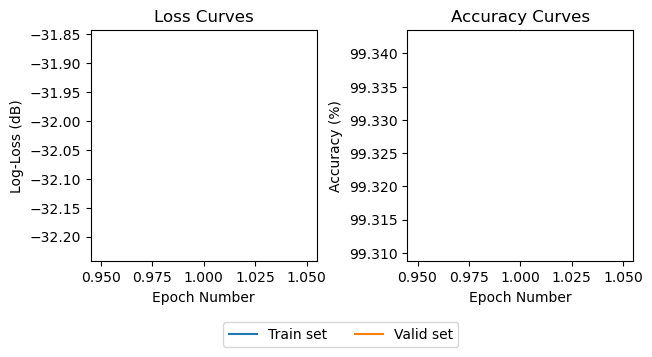

In [6]:
# Load model and show trainig and evaluation metrics
metrics = data.load_model(SAVE_MODEL_FILE, model)
eval.plot_metrics(metrics)

Precision = 0.8466
Recall = 0.8455
F1 = 0.8083
Accuracy = 84.28%


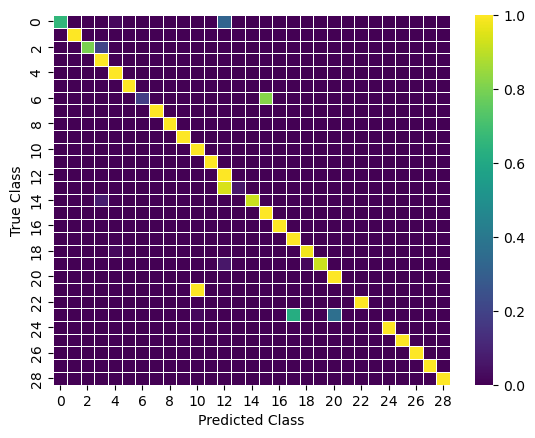

In [11]:
eval_metrics = eval.eval_model(model, test_loader1, device, conv=True)

Precision = 0.7632
Recall = 0.6570
F1 = 0.6302
Accuracy = 65.83%


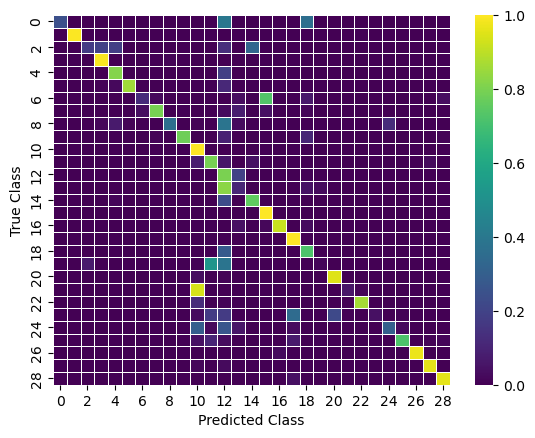

In [12]:
eval_metrics = eval.eval_model(model, test_loader2, device, conv=True)